# Kramer Problem Instanton Calculation

In this notebook we calculate the instanton for the Kramer problem using the Hamiltonian formulation of the instanton equations outline in ction III.A of [1].
    
The Kramer problem is defined via $\dot{x} = -\frac{dV}{dx} + \sqrt{\epsilon} \eta$ where, 
$V(x) = \frac{1}{4}(x^2 - 1)^2$ is a double well potential and $\eta$ is a Gaussian white noise.

The purpose of this is to test our Hamiltonian solver.

[1] https://doi.org/10.1063/1.5084025

In [1]:
# Standard Package imports

import numpy as np
import numpy.linalg as la
import numpy.random as rm
import matplotlib.pyplot as plt
import scipy.integrate

from tqdm.notebook import tqdm
from ham import Hamilton_solver

## Hamilton Equation Definitions

Here we define the RHS of the Hamilton equations for the instanton in the Kramer problem.

In [2]:
# Defining the RHS of Hamilton's Equations

def theta_rhs(t, state, s):
    """ Provides rhs of theta ODE. Will be passed to scipy integrator.
    - State should be of the form (time, ndim) where ndim is the number of theta variables.
    - If you want to use phi variables, put them in the s parameters NOT as state variables
    """
    p, phi = s
    return (3 * phi**2 - 1) * state
    
    
def phi_rhs(t, state, s):
    """ Provides rhs of phi ODE. Will be passed to scipy integrator.
     - State should be of the form (time, ndim) where ndim is the number of phi variables.
     - If you want to use theta variables, put them in the s parameters NOT as state variables
    """
        
    # Unpacking state and parameters
    p, theta = s
    [eps] = p
    
    return state * (1 - state**2) + theta

In [3]:
##---------------------------------------------
## Set Up
##---------------------------------------------

# OU Parameters
eps = 0.1
p = [eps]

# Time
steps = 100
T = 10
dt = T/steps
time = np.arange(0, T, dt)

# Initial Conditions
IC = rm.random((steps, 2))

# Boundary Conditions 
phi0 = -0.1
IC[0, 0] = phi0
lamb = 1

# Observable
def F(x): 
    return x

rhs = [phi_rhs, theta_rhs]

## Effect of T

Here we solve the Hamiltonian equations for a range of T to see how the solution is effected.

In [8]:
# Fixed for experiment

lamb = 1
dt = 0.1

# Observable
def F(x): 
    return x

In [9]:
# Choice of Times

Ts = np.linspace(2, 15, 5)
times = [np.arange(0, T, dt) for T in Ts]

In [10]:
# Calculating Instantons for different T
instantons = []

for time in tqdm(times):
    
    # Create appropriate ICs
    steps = len(time)
    IC = rm.random((steps, 2))

    # Boundary Conditions 
    phi0 = -1
    IC[0, 0] = phi0
    
    # Object Creation & run algorithm
    ham_alg = Hamilton_solver(rhs, time, IC, p, update=[F, lamb])
    ham_alg.run(10, timer=False)
    instantons.append(ham_alg.instanton)

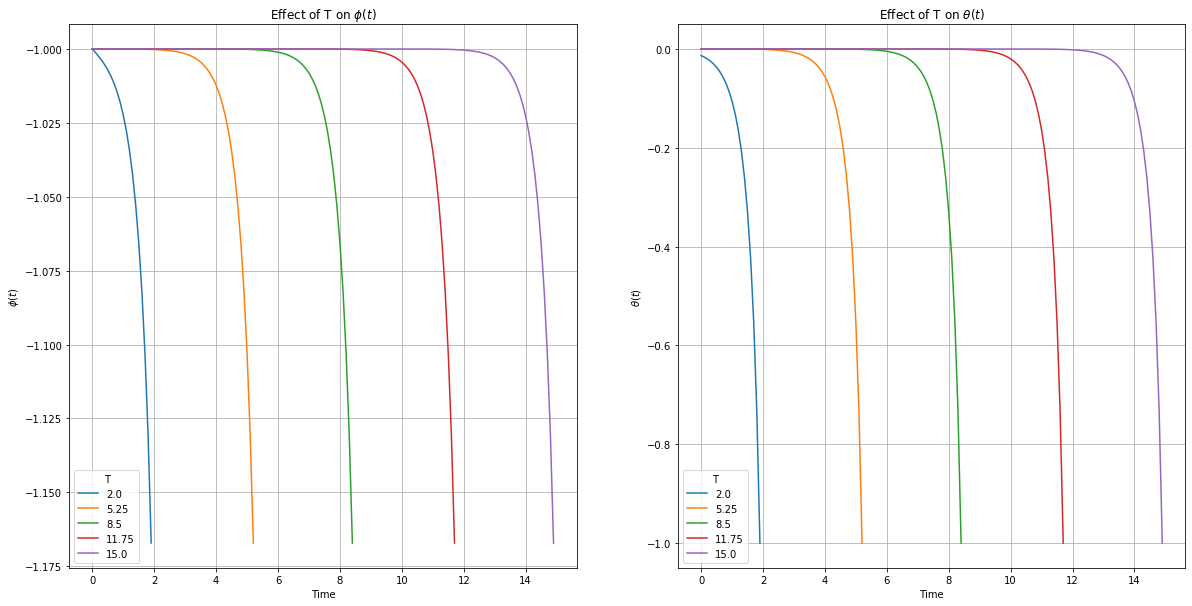

In [11]:
# Plotting Experiment Output

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

for (i, [time, ins]) in enumerate(zip(times, instantons)):
    T = Ts[i]
    axes[0].plot(time, ins[:, 0], label=f'{T}')
    axes[0].legend(title = 'T')
    axes[0].set_title('Effect of T on $\\phi(t)$')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('$\\phi(t)$')
    
    axes[1].plot(time, ins[:, 1], label=f'{T}')
    axes[1].legend(title = 'T')
    axes[1].set_title('Effect of T on $\\theta(t)$')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('$\\theta(t)$')
    
for ax in axes:
    ax.grid()
fig.show()